In [1]:
from pettingzoo.classic import connect_four_v3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions.categorical import Categorical

# own modules
from helper_functions import choose_action, reshape_image
from networks import Actor

0


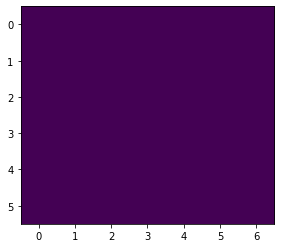

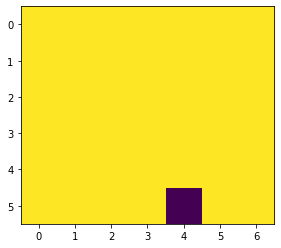

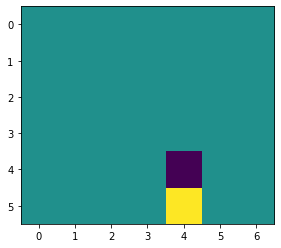

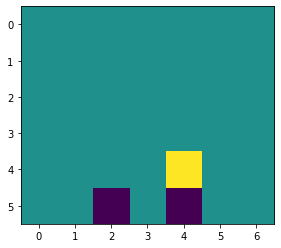

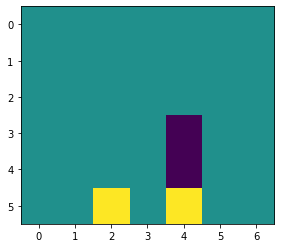

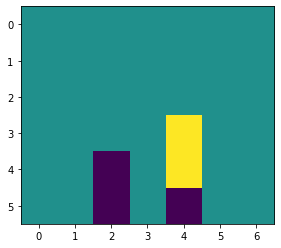

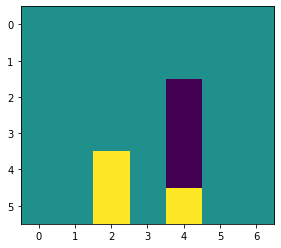

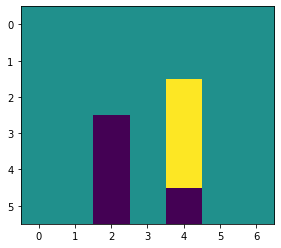

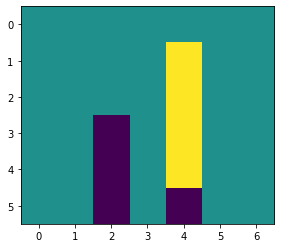

1


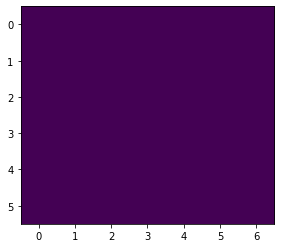

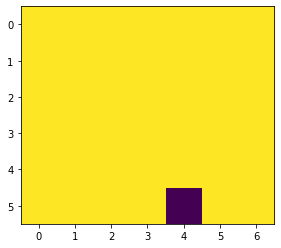

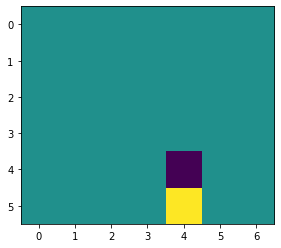

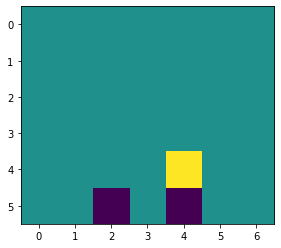

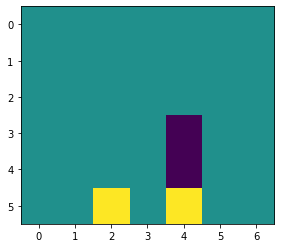

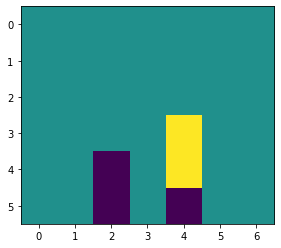

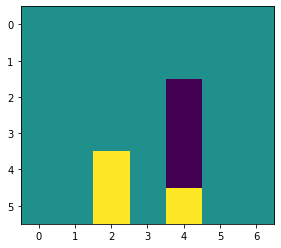

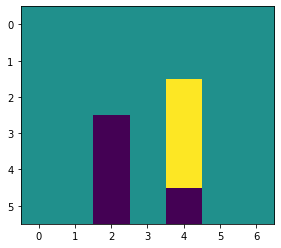

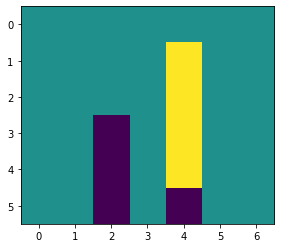

2


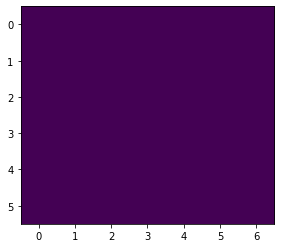

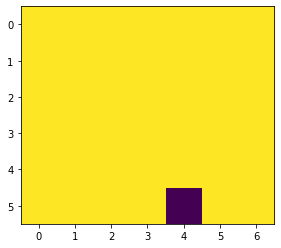

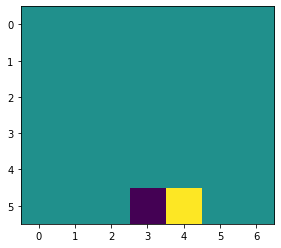

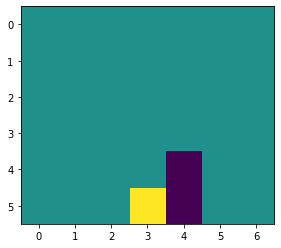

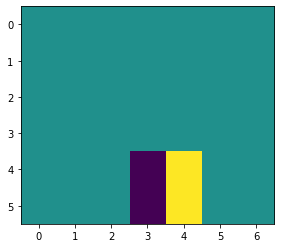

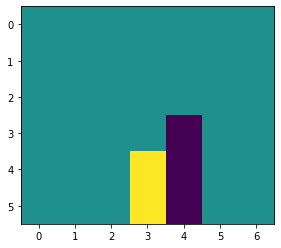

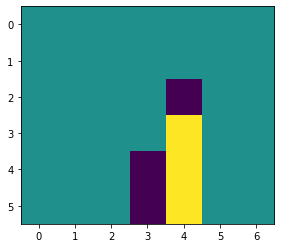

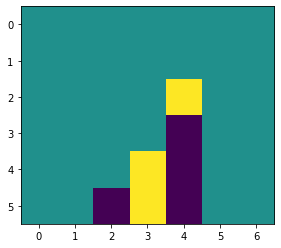

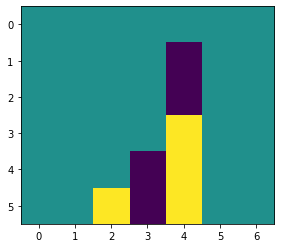

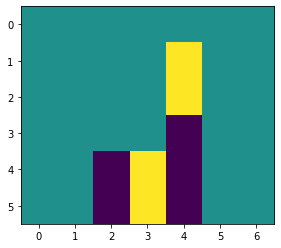

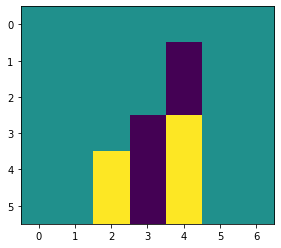

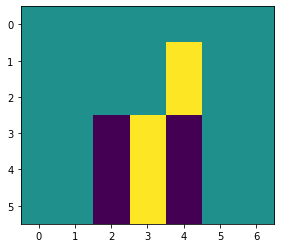

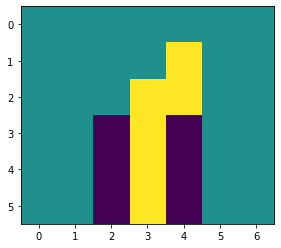

3


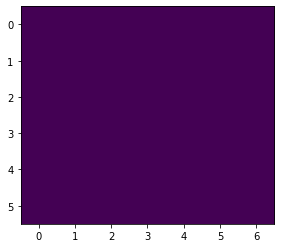

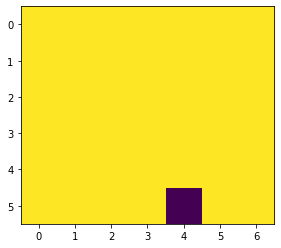

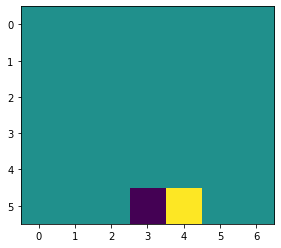

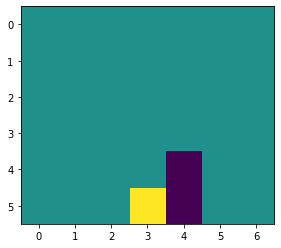

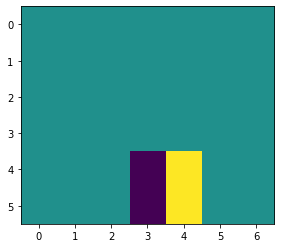

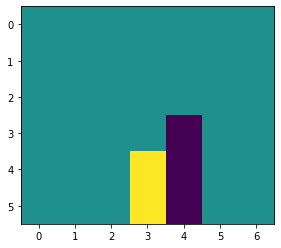

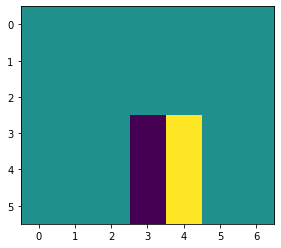

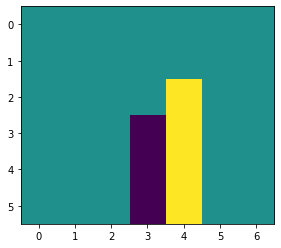

4


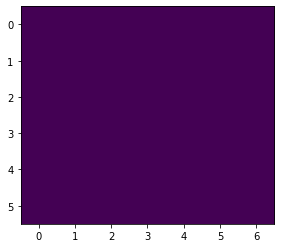

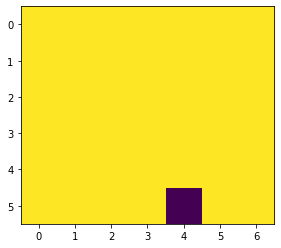

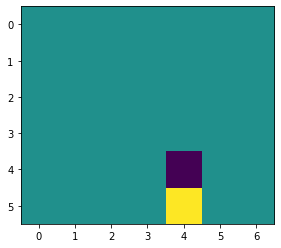

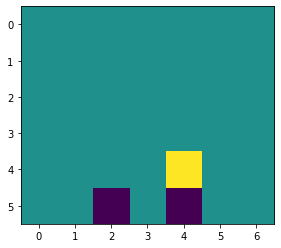

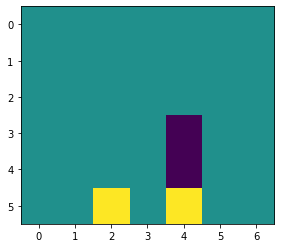

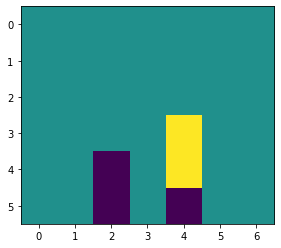

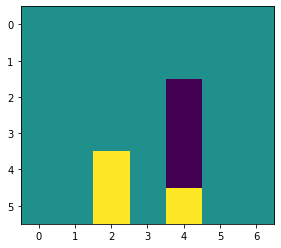

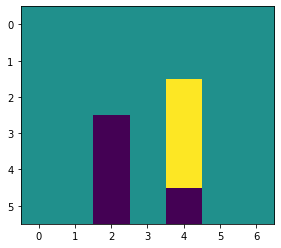

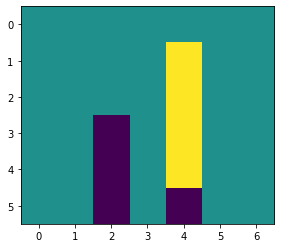

5


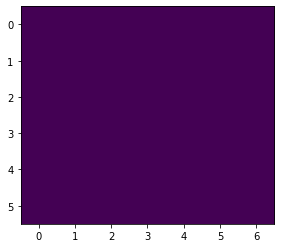

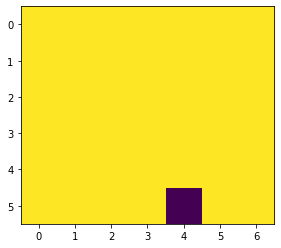

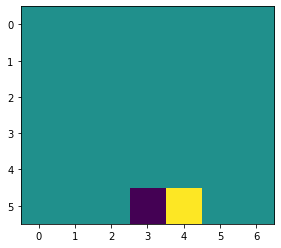

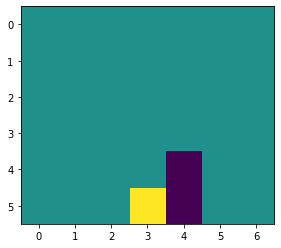

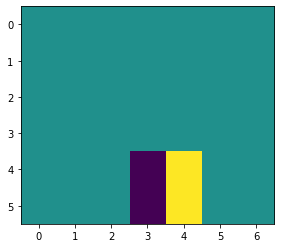

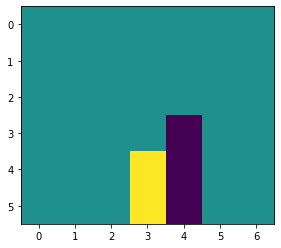

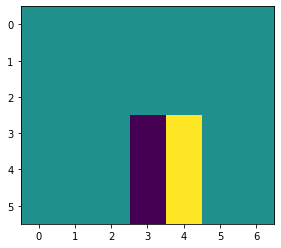

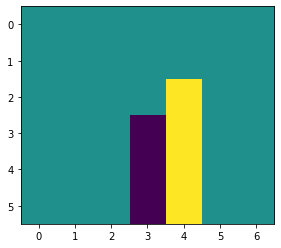

6


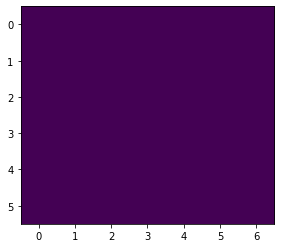

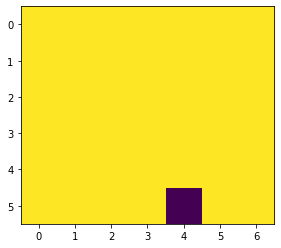

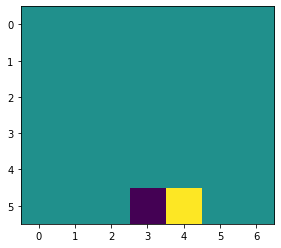

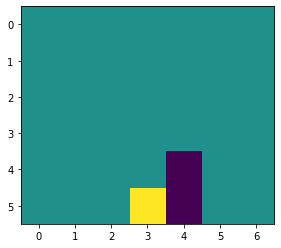

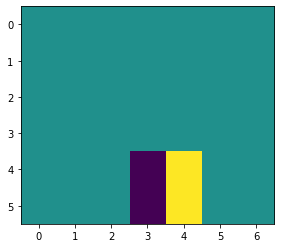

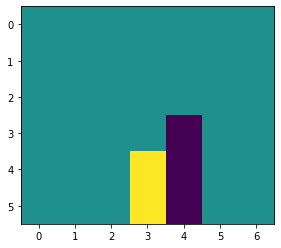

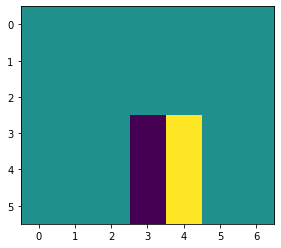

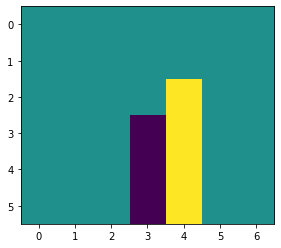

7


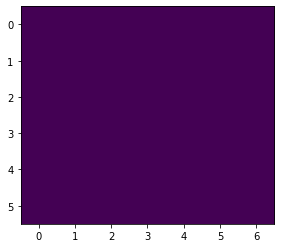

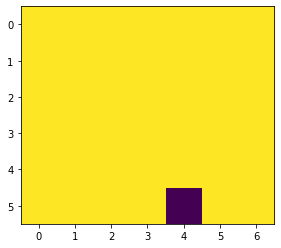

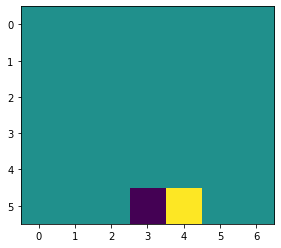

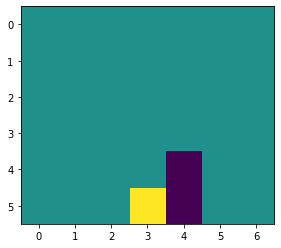

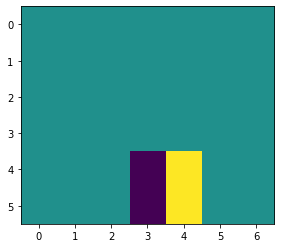

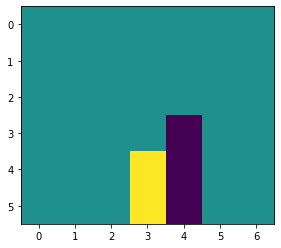

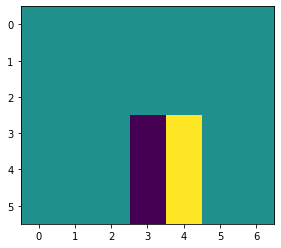

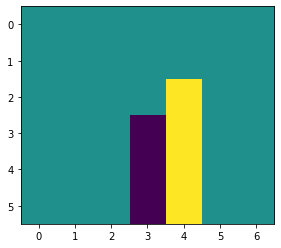

8


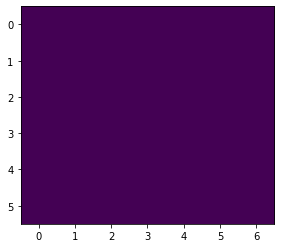

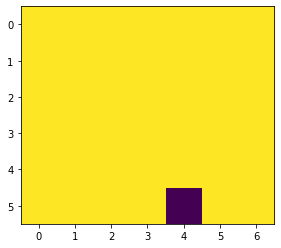

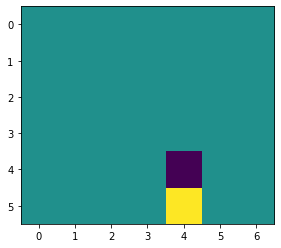

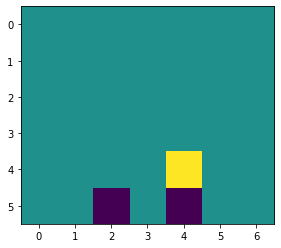

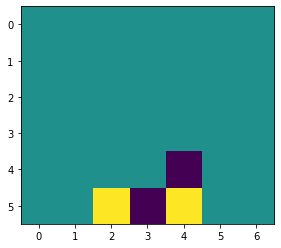

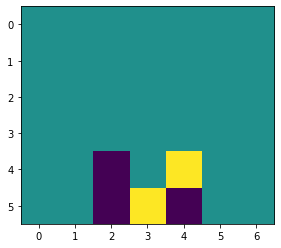

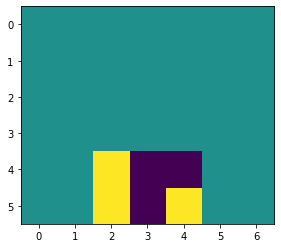

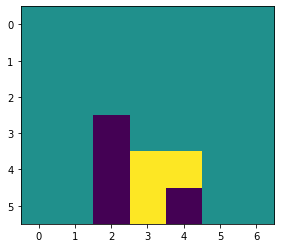

KeyboardInterrupt: 

In [10]:
m2_score = []
m1_score = []

for i in range(1000):

    print(i)

    # select model to play against
    model_1 = torch.load(f'models/model_in_use/actor_1')
    model_2 = torch.load(f'models/model_in_use/actor_2')

    # initialise gym env
    env = connect_four_v3.env()
    env.reset()
    done = False

    # select which player user is
    m_1 = f'player_{np.random.randint(0, 2)}'

    # iterate over agents
    for agent in env.agent_iter():

        # get obs
        observation, reward, done, _ = env.last()

        # get player to input action
        if agent == m_1:
            reshaped_observation = reshape_image(observation['observation'])
            action, _ = choose_action(  reshaped_observation, 
                                        observation['action_mask'], 
                                        model_1
                                    )

        # AI makes move
        else:
            reshaped_observation = reshape_image(observation['observation'])
            action, _ = choose_action(  reshaped_observation, 
                                        observation['action_mask'], 
                                        model_2
                                    )
        
        compressed_observation = observation['observation'][:, :, 0] + (-1 * observation['observation'][:, :, 1])
        plt.imshow(compressed_observation)
        plt.show()

        if done:

            # determine who won
            if agent == m_1:
                m1_score.append(reward)
                break
            else:
                m2_score.append(reward)
                break

        env.step(action)

In [9]:
print(m1_score)

[1, 1]
